## DESCRIPTION

### Problem Statement

- Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
- The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
- You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

In [1]:
# import the needed libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, confusion_matrix, precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm 
import sklearn.model_selection as model_selection
import numpy as np
import tensorflow as tf
! pip install textblob
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Project Task: Week 1

Class Imbalance Problem:

1. Perform an EDA on the dataset.

       a)  See what a positive, negative, and neutral review looks like

       b)  Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score.

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [2]:
# read the train and test dataset
Amazon_df_train = pd.read_csv("train_data.csv", nrows=4000)
Amazon_df_test = pd.read_csv("test_data_hidden.csv") 

In [3]:
# check the first few row of the train data
Amazon_df_train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
# check the first few row of the test_val data
Amazon_df_test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [5]:
# check the shape of the train data
Amazon_df_train.shape

(4000, 8)

In [6]:
# check the shape of the test_val data
Amazon_df_test.shape

(1000, 8)

In [7]:
Amazon_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [8]:
Amazon_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [9]:
# check null value (10 missing value in reviews.title column)
Amazon_df_train.isna().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [10]:
# check null value (3 missing value in reviews.title column)
Amazon_df_test.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [11]:
# handle missing value in train data
Amazon_df_train['reviews.title'] = Amazon_df_train['reviews.title'].fillna(" ")
Amazon_df_train.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
sentiment            0
dtype: int64

In [12]:
# handle missing value in test data
Amazon_df_test['reviews.title'] = Amazon_df_test['reviews.title'].fillna(" ")
Amazon_df_test.isna().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
sentiment            0
dtype: int64

In [13]:
Amazon_df_train['brand'].value_counts()

Amazon    4000
Name: brand, dtype: int64

In [14]:
Amazon_df_test['brand'].value_counts()

Amazon    1000
Name: brand, dtype: int64

In [15]:
Amazon_df_train.drop(['brand'], axis=1, inplace=True)
Amazon_df_test.drop(['brand'], axis=1, inplace=True)

In [16]:
# check for duplicate rows (58 duplicate rows in train data)
Amazon_df_train.duplicated().sum()

58

In [17]:
# check the sentiment in the duplicate rows
duplicate_train = Amazon_df_train[Amazon_df_train.duplicated() == True]
duplicate_train.sentiment.value_counts()

Positive    55
Negative     3
Name: sentiment, dtype: int64

In [18]:
# check for duplicate rows (3 duplicate rows in train data)
Amazon_df_test.duplicated().sum()

3

In [19]:
# check duplicate rows
duplicate_test = Amazon_df_test[Amazon_df_test.duplicated() == True]
duplicate_test

,name,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
389,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-06-23T00:00:00.000Z,This tablet does a great deal! From surfing th...,Does a lot,Positive
420,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-10-18T00:00:00.000Z,I wanted to get something nice for my wife and...,Wife loved it,Positive
886,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Fire Tablets,Tablets,All Tablets,Amazon Tablets",Electronics,2016-12-14T00:00:00.000Z,I bought one for my boyfriend and one for his ...,Great tablet for normal use,Positive


In [20]:
# drop the duplicate rows in train data
Amazon_df_train.drop_duplicates(inplace=True)
Amazon_df_train.duplicated().sum()

0

In [21]:
# drop the duplicate rows in test data
Amazon_df_test.drop_duplicates(inplace=True)
Amazon_df_test.duplicated().sum()

0

### Exploratory Data Analysis

In [22]:
# Check the positive, negative, and neutral reviews 
Positive = Amazon_df_train[Amazon_df_train['sentiment'] =='Positive']
Positive[['reviews.title','reviews.text']]

,reviews.title,reviews.text
0,Powerful tablet,Purchased on Black FridayPros - Great Price (e...
1,Amazon Echo Plus AWESOME,I purchased two Amazon in Echo Plus and two do...
3,Greattttttt,"very good product. Exactly what I wanted, and ..."
4,Very durable!,This is the 3rd one I've purchased. I've bough...
5,You will love it,This is a great product. Light weight. I wish ...
...,...,...
3995,Fun toy,"It‚Äôs fun for the family to play with, but it..."
3996,Great Product,"I love the Kindle, it is a great product. It r..."
3997,"Great ""dumb"" speaker",I was looking for a blutooth speaker to use wi...
3998,A great 7 inch tablet at a great price,This is the second Amazon Fire 7 tablet I have...


In [23]:
Positive = Amazon_df_train[Amazon_df_train['sentiment'] =='Negative']
Positive[['reviews.title','reviews.text']]

,reviews.title,reviews.text
9,"was cheap, can not run chrome stuff, returned","was cheap, can not run chrome stuff, returned ..."
97,Useless screen so why pay for it?,"Worthless, except as a regular echo and a poor..."
104,Amazon Fire 7 Tablet,Too bad Amazon turned this tablet into a big a...
121,Kid's Kindle,I bought this Kindle for my 7 year old grand-d...
150,Have never purchased a more frustrating Device,I am reading positive reviews and wish I could...
...,...,...
3818,Terrible,I bought this because I have ebooks in college...
3864,Just ok,This tablet could be so much better if the app...
3876,Not worth the money,"Waste of money, ask Alexa a question and you a..."
3898,Just get a regular Echo or a good portable Spe...,"The tap is a great concept, I love my echo so ..."


In [24]:
Positive = Amazon_df_train[Amazon_df_train['sentiment'] =='Neutral']
Positive[['reviews.title','reviews.text']]

,reviews.title,reviews.text
2,Average,Just an average Alexa option. Does show a few ...
6,OK For Entry Level Tablet,My 7-year old daughter saved up to by this. He...
17,Not as good as before,"Not as good as before the old kindle, just sea..."
59,"Does what it says, missing one key feature",There is nothing spectacular about this item b...
95,Haven't set it up yet,It's unfair for me to rate this product cause ...
...,...,...
3819,An ok tablet,It's an ok tablet because you need to have an ...
3840,"Decent, does the job","Works fine on wifi, otherwise a little slow. M..."
3904,ok tablet for a small child,The sleek design and colors available for smal...
3949,Ok for the price.,Decent somewhat slow. Netflix freezes up at ti...


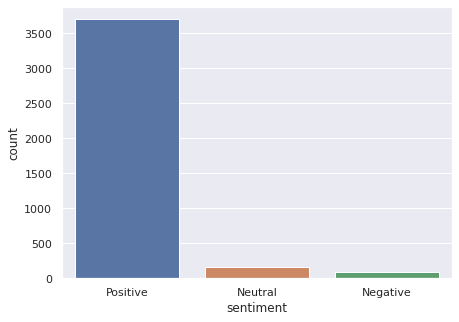

In [25]:
# Check the class count for each class.
plt.figure(figsize=(7,5))
sns.countplot(data=Amazon_df_train,x=Amazon_df_train['sentiment'])

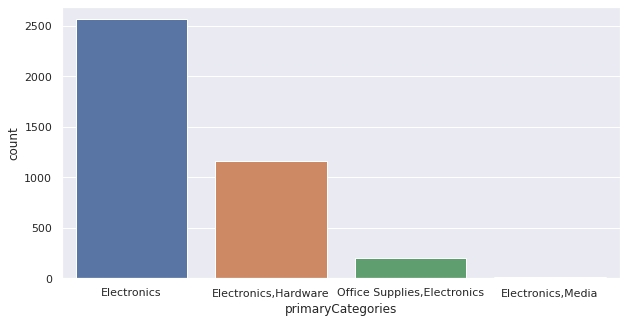

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=Amazon_df_train,x=Amazon_df_train['primaryCategories'])

In [27]:
Amazon_df_train['sentiment'] = Amazon_df_train['sentiment'].map({'Positive':2,'Neutral':1 ,'Negative':0})

In [28]:
Amazon_df_test['sentiment'] = Amazon_df_test['sentiment'].map({'Positive':2,'Neutral':1 ,'Negative':0})

In [29]:
Amazon_df_train.shape

(3942, 7)

In [30]:
reviewsText_train = Amazon_df_train['reviews.text'].tolist()
reviewsText_test = Amazon_df_test['reviews.text'].tolist()
reviewsTitle_train = Amazon_df_train['reviews.title'].tolist()
reviewsTitle_test = Amazon_df_test['reviews.title'].tolist()

In [31]:
len(reviewsText_train)

3942

In [32]:
Amazon_df_train['reviews.text'].isna().sum()

0

In [33]:
def preprocess_text(reviews):
    
    # Normalize the casing 
    corp = str(reviews).lower() 
    
    # Replace URLs # Remove punctuation # Remove numbers
    corp = re.sub('[^a-zA-Z]+',' ', corp).strip()
    corp = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',' ', corp).strip()
    corp = re.sub(r'[^\w\d\s]',' ', corp).strip()
    corp = re.sub(r'\d+(\.\d+)?',' ', corp).strip()
     
    #tokenize the tweets into individual terms
    tokens = word_tokenize(corp)
    
    # Remove stop words.
    words = [t for t in tokens if t not in stop_words]
    
    lemmatize = [lemma.lemmatize(w) for w in words]
    
    return lemmatize    

In [34]:
lemma = WordNetLemmatizer()
preprocess_reviewsText = [preprocess_text(i) for i in reviewsText_train]
preprocess_reviewsTitle = [preprocess_text(i) for i in reviewsTitle_train] 

In [35]:
clean_reviewsText = [' '.join(review) for review in preprocess_reviewsText] 
clean_reviewsTitle = [' '.join(review) for review in preprocess_reviewsTitle] 

In [36]:
lemma = WordNetLemmatizer()
preprocess_reviewsText_test = [preprocess_text(i) for i in reviewsText_test]
preprocess_reviewsTitle_test = [preprocess_text(i) for i in reviewsTitle_test] 

In [37]:
clean_reviewsText_test = [' '.join(review) for review in preprocess_reviewsText_test] 
clean_reviewsTitle_test = [' '.join(review) for review in preprocess_reviewsTitle_test]

In [38]:
clean_reviewsText[0:6] 

['purchased black fridaypros great price even sale powerful fast quad core processor amazing soundwell builtcons amazon ad amazon need subsidize tablet remove add pay inability access apps except one amazon way able accomplish add google play storenet great tablet money',
 'purchased two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas happy purchase learning much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa gave best chili recipe mean best called chili want husband use alexa stay organized business date reminder way go',
 'average alexa option show thing screen still limited',
 'good product exactly wanted good price',
 'rd one purchased bought one niece case compare one held protected tablet many time dropping',
 'great product light weight wish wifi download online']

In [39]:
clean_reviewsTitle[0:6]

['powerful tablet',
 'amazon echo plus awesome',
 'average',
 'greattttttt',
 'durable',
 'love']

In [40]:
pd.DataFrame(Amazon_df_train['name'].value_counts())

,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


In [41]:
pd.DataFrame(Amazon_df_train['categories'].value_counts())

,categories
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162
"Office,eBook Readers,Electronics Features,Walmart for Business,Tablets,Electronics,Amazon Ereaders,Office Electronics,iPad & Tablets,Kindle E-readers,All Tablets,Amazon Book Reader,Computers & Tablets",122


In [42]:
pd.DataFrame(Amazon_df_train['primaryCategories'].value_counts())

,primaryCategories
Electronics,2562
"Electronics,Hardware",1159
"Office Supplies,Electronics",204
"Electronics,Media",17


In [43]:
# convert the categorical variables
le_name = LabelEncoder()
le_categories = LabelEncoder()
le_primaryCategories = LabelEncoder()

In [44]:
Amazon_df_train['name'] =  le_name.fit_transform(Amazon_df_train['name'].values)
Amazon_df_train['categories'] = le_categories.fit_transform(Amazon_df_train['categories'].values)
Amazon_df_train['primaryCategories'] = le_primaryCategories.fit_transform(Amazon_df_train['primaryCategories'].values)

In [45]:
# convert the categorical variables of the test set
le_name_test = LabelEncoder()
le_categories_test = LabelEncoder()
le_primaryCategories_test = LabelEncoder()

In [46]:
Amazon_df_test['name'] =  le_name_test.fit_transform(Amazon_df_test['name'].values)
Amazon_df_test['categories'] = le_categories_test.fit_transform(Amazon_df_test['categories'].values)
Amazon_df_test['primaryCategories'] = le_primaryCategories_test.fit_transform(Amazon_df_test['primaryCategories'].values)

In [47]:
Amazon_df_train.head()

,name,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,2,10,0,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2
1,5,1,1,2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2
2,9,2,1,2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,1
3,14,22,3,2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,2
4,13,9,0,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,2


In [48]:
Amazon_df_train['reviews.date'].str.split('T').str[0:2]

0       [2016-12-26, 00:00:00.000Z]
1       [2018-01-17, 00:00:00.000Z]
2       [2017-12-20, 00:00:00.000Z]
3       [2017-08-04, 00:00:00.000Z]
4       [2017-01-23, 00:00:00.000Z]
                   ...             
3995    [2017-12-08, 00:00:00.000Z]
3996    [2017-03-31, 00:00:00.000Z]
3997    [2017-01-19, 00:00:00.000Z]
3998    [2016-05-27, 00:00:00.000Z]
3999    [2016-12-30, 00:00:00.000Z]
Name: reviews.date, Length: 3942, dtype: object

In [49]:
Amazon_df_train['reviews.date'] = Amazon_df_train['reviews.date'].str.split('T').str[0]
Amazon_df_train['reviews_day'] = pd.to_datetime(Amazon_df_train['reviews.date'], format = '%Y-%m-%d').dt.day
Amazon_df_train['reviews_month'] = pd.to_datetime(Amazon_df_train['reviews.date'], format = '%Y-%m-%d').dt.month
Amazon_df_train['reviews_year'] = pd.to_datetime(Amazon_df_train['reviews.date'], format = '%Y-%m-%d').dt.year

In [50]:
Amazon_df_train.drop(['reviews.date'], axis=1, inplace=True)

In [51]:
Amazon_df_test['reviews.date'] = Amazon_df_test['reviews.date'].str.split('T').str[0]
Amazon_df_test['reviews_day'] = pd.to_datetime(Amazon_df_test['reviews.date'], format = '%Y-%m-%d').dt.day
Amazon_df_test['reviews_month'] = pd.to_datetime(Amazon_df_test['reviews.date'], format = '%Y-%m-%d').dt.month
Amazon_df_test['reviews_year'] = pd.to_datetime(Amazon_df_test['reviews.date'], format = '%Y-%m-%d').dt.year

In [52]:
Amazon_df_test.drop(['reviews.date'], axis=1, inplace=True)

In [53]:
Amazon_df_train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,2,10,0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2,26,12,2016
1,5,1,1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2,17,1,2018
2,9,2,1,Just an average Alexa option. Does show a few ...,Average,1,20,12,2017
3,14,22,3,"very good product. Exactly what I wanted, and ...",Greattttttt,2,4,8,2017
4,13,9,0,This is the 3rd one I've purchased. I've bough...,Very durable!,2,23,1,2017


In [54]:
Amazon_df_test.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,19,11,0,Amazon kindle fire has a lot of free app and c...,very handy device,2,23,5,2016
1,9,6,1,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2,2,1,2018
2,2,10,0,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2,2,1,2017
3,13,9,0,"I use mine for email, Facebook ,games and to g...",Love it!!!,2,25,3,2017
4,9,6,1,This is a fantastic item & the person I bought...,Fantastic!,2,15,11,2017


In [55]:
reviewsText = [] 
reviewsText = clean_reviewsText + clean_reviewsText_test
reviewsTitle = clean_reviewsTitle + clean_reviewsTitle_test

TfidfVect = TfidfVectorizer() 
reviews = TfidfVect.fit_transform(reviewsText) 
words = TfidfVect.get_feature_names()

In [56]:
# Convert the reviews in train set into Tf-Idf score

vectorizer_text = TfidfVectorizer() 
vectorizer_text.fit(reviewsText)

vectorizer_title = TfidfVectorizer() 
vectorizer_title.fit(reviewsTitle)

Vect_reviewsText = pd.DataFrame(vectorizer_text.transform(clean_reviewsText).toarray()) 
Vect_reviewsTitle = pd.DataFrame(vectorizer_title.transform(clean_reviewsTitle).toarray()) 


Amazon_df_train = Amazon_df_train.reset_index()
Amazon_df_train = pd.concat([Amazon_df_train.drop(['reviews.text','reviews.title','index'],axis=1), Vect_reviewsText, Vect_reviewsTitle],axis=1)
Amazon_df_train.head()

,name,categories,primaryCategories,sentiment,reviews_day,reviews_month,reviews_year,0,1,2,...,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168
0,2,10,0,2,26,12,2016,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,1,2,17,1,2018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,2,1,1,20,12,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,22,3,2,4,8,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,9,0,2,23,1,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Convert the reviews in test set into Tf-Idf score
Vect_reviewsText_test = pd.DataFrame(vectorizer_text.transform(clean_reviewsText_test).toarray()) 
Vect_reviewsTitle_test = pd.DataFrame(vectorizer_title.transform(clean_reviewsTitle_test).toarray()) 


Amazon_df_test = Amazon_df_test.reset_index()
Amazon_df_test = pd.concat([Amazon_df_test.drop(['reviews.text','reviews.title','index'],axis=1), Vect_reviewsText_test, Vect_reviewsTitle_test],axis=1)
Amazon_df_test.head()

,name,categories,primaryCategories,sentiment,reviews_day,reviews_month,reviews_year,0,1,2,...,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168
0,19,11,0,2,23,5,2016,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,6,1,2,2,1,2018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,10,0,2,2,1,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,9,0,2,25,3,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,6,1,2,15,11,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Split into train and test set
X_train = Amazon_df_train.drop(['sentiment'],axis =1)
X_test = Amazon_df_test.drop(['sentiment'],axis =1)
Y_train = Amazon_df_train['sentiment']
Y_test =  Amazon_df_test['sentiment']

In [59]:
X_train.shape

(3942, 5735)

In [ ]:
# Run multinomial Naive Bayes classifier. 
# Everything is classified as positive because of the class imbalance.
clf_NB = MultinomialNB()
clf_NB.fit(X_train, Y_train)
NB_predict = clf_NB.predict(X_test)
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, NB_predict)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, NB_predict,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, NB_predict)))

Accuracy :  93.68
F1 :  90.62
classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



#### Project Task: Week 2

Tackling Class Imbalance Problem:

1. Oversampling or undersampling can be used to tackle the class imbalance problem. 
2. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
3. Use Tree-based classifiers like Random Forest and XGBoost.
**Note:** Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

In [60]:
# define oversampling strategy
oversample = SMOTE(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train.values, Y_train)

In [61]:
# check the number of sample before and after oversampling
print(Counter(Y_train))
print(Counter(y_over))

Counter({2: 3694, 1: 158, 0: 90})
Counter({2: 3694, 1: 3694, 0: 3694})


In [ ]:
# RandomForestClassifier 
clf_RF = RandomForestClassifier(max_depth=3, random_state=0)
# fit the data
clf_RF.fit(X_over, y_over)
clf_RF_predict = clf_RF.predict(X_test) 
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, clf_RF_predict)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, clf_RF_predict,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, clf_RF_predict)))

Accuracy :  89.67
F1 :  90.13
classification Report : 
               precision    recall  f1-score   support

           0       0.31      0.21      0.25        24
           1       0.17      0.26      0.20        39
           2       0.95      0.94      0.95       934

    accuracy                           0.90       997
   macro avg       0.48      0.47      0.47       997
weighted avg       0.91      0.90      0.90       997



- RandomForest Classifier f1-score is 90.13% 

In [ ]:
# XGBoost Classifier  
xgb = XGBClassifier()
# fit the data
xgb.fit(X_over, y_over)
xgb_predictions = xgb.predict(X_test.values)
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, xgb_predictions)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, xgb_predictions,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, xgb_predictions)))

Accuracy :  91.37
F1 :  91.65
classification Report : 
               precision    recall  f1-score   support

           0       0.42      0.33      0.37        24
           1       0.27      0.36      0.31        39
           2       0.96      0.95      0.96       934

    accuracy                           0.91       997
   macro avg       0.55      0.55      0.55       997
weighted avg       0.92      0.91      0.92       997



- XGBoost Classifier f1-score is 91.65% and it does a better job in classifying the other classes compared to Random Forest Classifier.

#### Project Task: Week 3

Model Selection:

1. Apply multi-class SVM’s and neural nets.
2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

In [ ]:
# Apply multi-class SVM’s 
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_over, y_over)
rbf_pred = rbf.predict(X_test)
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, rbf_pred)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, rbf_pred,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, rbf_pred)))

Accuracy :  94.08
F1 :  91.73
classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.75      0.08      0.14        39
           2       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.90      0.39      0.42       997
weighted avg       0.94      0.94      0.92       997



-  Multi-class SVM f1-score is 91.73%, it is improved by fractions compared to XGBoost Classifier. However, XGBoost does a better job in classifying the other classes.  

In [ ]:
X_over.shape

(11082, 5735)

In [ ]:
y_over_NN = tf.keras.utils.to_categorical(y_over, 3)
Y_test_NN = tf.keras.utils.to_categorical(Y_test, 3)

In [ ]:
# neural nets
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((5735,),input_shape=(5735,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation='relu'))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3, activation='softmax'))
 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_over, y_over_NN,
          validation_data=(X_test,Y_test_NN),
          batch_size=32,
          epochs=5)

Epoch 1/5
347/347 [==============================] - 4s 8ms/step - loss: 0.1226 - accuracy: 0.9598 - val_loss: 5.1721 - val_accuracy: 0.0391
Epoch 2/5
347/347 [==============================] - 3s 8ms/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 0.3131 - val_accuracy: 0.9488
Epoch 3/5
347/347 [==============================] - 3s 7ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.4109 - val_accuracy: 0.9288
Epoch 4/5
347/347 [==============================] - 3s 8ms/step - loss: 0.0126 - accuracy: 0.9968 - val_loss: 0.4733 - val_accuracy: 0.9258
Epoch 5/5
347/347 [==============================] - 3s 8ms/step - loss: 0.0216 - accuracy: 0.9921 - val_loss: 0.5213 - val_accuracy: 0.9298


-Neural nets model train accuracy is 99%, and validation accuracy is 91%. The model is overfitting the training data.

In [ ]:
# oversampled multinomial NB
clf_ONB = MultinomialNB()
clf_ONB.fit(X_over, y_over)
ONB_predict = clf_ONB.predict(X_test)
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, ONB_predict)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, ONB_predict,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, ONB_predict))) 

Accuracy :  88.87
F1 :  90.39
classification Report : 
               precision    recall  f1-score   support

           0       0.40      0.50      0.44        24
           1       0.18      0.36      0.24        39
           2       0.97      0.92      0.94       934

    accuracy                           0.89       997
   macro avg       0.52      0.59      0.54       997
weighted avg       0.92      0.89      0.90       997



- After using oversampling to tackle the class imbalance problem, the multinomial NB is able to classify other classes.

In [ ]:
# ensemble techniques (XGboost + oversampled_multinomial_NB)
model1_NB = MultinomialNB()
model2_XGB =  XGBClassifier(n_estimators=50,max_depth=3)
model_vot = VotingClassifier(estimators=[('lr', model1_NB), ('dt', model2_XGB)], voting='hard')
model_vot.fit(X_over, y_over)
model_vot_pred = model_vot.predict(X_test.values) 
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, model_vot_pred)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, model_vot_pred,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, model_vot_pred)))

Accuracy :  84.35
F1 :  87.62
classification Report : 
               precision    recall  f1-score   support

           0       0.28      0.58      0.38        24
           1       0.15      0.44      0.22        39
           2       0.97      0.87      0.92       934

    accuracy                           0.84       997
   macro avg       0.47      0.63      0.51       997
weighted avg       0.92      0.84      0.88       997



### Sentiment Score

In [ ]:
data_train = {  
    'clean_reviewsText'      : clean_reviewsText,
    'clean_reviewsTitle'     : clean_reviewsTitle 
}
df_train = pd.DataFrame(data=data_train)

In [ ]:
data_test = {   
    'clean_reviewsText_test' : clean_reviewsText_test,
    'clean_reviewsTitle_test': clean_reviewsTitle_test
}
df_test = pd.DataFrame(data=data_test)

In [ ]:
# First use TextBlob to assign a score to the sentence sentiment.
X_train['sentiment_score_text'] = df_train['clean_reviewsText'].apply(lambda x: (TextBlob(x).sentiment.polarity))
X_train['sentiment_score_title'] = df_train['clean_reviewsTitle'].apply(lambda x: (TextBlob(x).sentiment.polarity))
X_train[['sentiment_score_text','sentiment_score_title']].head()

,sentiment_score_text,sentiment_score_title
0,0.433333,0.30
1,0.441071,1.00
2,-0.110714,-0.15
3,0.550000,0.00
4,0.500000,0.00


In [ ]:
X_test['sentiment_score_text'] = df_test['clean_reviewsText_test'].apply(lambda x: (TextBlob(x).sentiment.polarity))
X_test['sentiment_score_title'] =  df_test['clean_reviewsTitle_test'].apply(lambda x: (TextBlob(x).sentiment.polarity))
X_test[['sentiment_score_text','sentiment_score_title']].head()

,sentiment_score_text,sentiment_score_title
0,0.400000,0.60
1,0.515595,0.00
2,0.900000,0.05
3,-0.072222,0.50
4,0.450000,0.40


In [ ]:
# define oversampling strategy
oversample = SMOTE(sampling_strategy='not majority')
# fit and apply the transform
X_over_sc, y_over_sc = oversample.fit_resample(X_train.values, Y_train)

In [ ]:
# XGBoost Classifier  
xgb_ss = XGBClassifier()
# fit the data
xgb_ss.fit(X_over_sc, y_over_sc)
xgb_ss_predictions = xgb_ss.predict(X_test.values) 
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, xgb_ss_predictions)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, xgb_ss_predictions,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, xgb_ss_predictions)))

Accuracy :  92.28
F1 :  92.76
classification Report : 
               precision    recall  f1-score   support

           0       0.54      0.54      0.54        24
           1       0.28      0.38      0.32        39
           2       0.97      0.96      0.96       934

    accuracy                           0.92       997
   macro avg       0.60      0.63      0.61       997
weighted avg       0.93      0.92      0.93       997



In [ ]:
X_train.drop(['sentiment_score_text','sentiment_score_title'],axis=1,inplace=True)
X_test.drop(['sentiment_score_text','sentiment_score_title'],axis=1,inplace=True)

In [ ]:
X_test.head()

,name,categories,primaryCategories,reviews_day,reviews_month,reviews_year,0,1,2,3,...,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168
0,19,11,0,23,5,2016,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,6,1,2,1,2018,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,10,0,2,1,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,9,0,25,3,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,6,1,15,11,2017,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Project Task: Week 4

Applying LSTM:

1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)
**Hint:** Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

2. Compare the accuracy of neural nets with traditional ML based algorithms.

3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 
**Hint:** Use techniques like Grid Search, Cross-Validation and Random Search

### LSTM 

In [62]:
# LSTM 
embedding_length= 128
Dropout=0.3
epochs= 3 
batch_size= 128

In [63]:
y_over_RNN = tf.keras.utils.to_categorical(y_over, 3)
Y_test_RNN = tf.keras.utils.to_categorical(Y_test, 3)

In [64]:
X_over.shape

(11082, 5735)

In [68]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(5735, embedding_length, input_length=5735))
model.add(tf.keras.layers.SpatialDropout1D(Dropout))
model.add(tf.keras.layers.LSTM(64, dropout=Dropout, recurrent_dropout=Dropout))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(X_over, y_over_RNN, epochs=epochs, batch_size=batch_size)

Epoch 1/3
87/87 [==============================] - 2878s 33s/step - loss: 1.0999 - acc: 0.3418
Epoch 2/3
87/87 [==============================] - 2849s 33s/step - loss: 1.0991 - acc: 0.3318
Epoch 3/3
87/87 [==============================] - 2855s 33s/step - loss: 1.0989 - acc: 0.3330


In [70]:
y_pred = model.predict(X_test, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, y_pred_bool)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, y_pred_bool,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, y_pred_bool)))

Accuracy :  3.91
F1 :  0.29
classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.04      1.00      0.08        39
           2       0.00      0.00      0.00       934

    accuracy                           0.04       997
   macro avg       0.01      0.33      0.03       997
weighted avg       0.00      0.04      0.00       997



### GRU (Gated Recurrent Units)

In [65]:
# GRU (Gated Recurrent Units).  
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(5735, embedding_length, input_length=5735))
model.add(tf.keras.layers.GRU(64, dropout=Dropout, recurrent_dropout=Dropout))
model.add(tf.keras.layers.Dense(3, activation='softmax')) 

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(X_over, y_over_RNN, epochs=epochs, batch_size=batch_size)

Epoch 1/3
87/87 [==============================] - 2628s 30s/step - loss: 1.0999 - acc: 0.3291
Epoch 2/3
87/87 [==============================] - 2581s 30s/step - loss: 1.0994 - acc: 0.3239
Epoch 3/3
87/87 [==============================] - 2568s 30s/step - loss: 1.0994 - acc: 0.3297


In [67]:
y_pred = model.predict(X_test, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
print('Accuracy : ', "%.2f" % (accuracy_score(Y_test, y_pred_bool)*100))
print('F1 : ', "%.2f" % (f1_score(Y_test, y_pred_bool,average='weighted')*100))
print('classification Report : \n', (classification_report(Y_test, y_pred_bool)))

Accuracy :  3.91
F1 :  0.29
classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.04      1.00      0.08        39
           2       0.00      0.00      0.00       934

    accuracy                           0.04       997
   macro avg       0.01      0.33      0.03       997
weighted avg       0.00      0.04      0.00       997



- The accuracy of LSTM and GRU is quite low compared to NN, however, traditional ML shows higher accuracy compared to NN. 

#### Optional Tasks: Week 4

Topic Modeling:

1. Cluster similar reviews.
**Note:** Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.

2. Perform Topic Modeling
**Hint:** Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

### Cluster similar reviews.

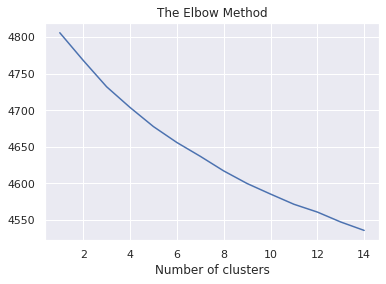

In [ ]:
# Use the elbow method to decide the number of clusters
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(reviews)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,15),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
# 12 clusters
kmeans = KMeans(n_clusters = 12, n_init = 20 ) 
kmeans.fit(reviews)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for number, centroid in enumerate(common_words):
    print('Cluster ' + str(number) + ' : \n ' + ', '.join(words[word] for word in centroid))

Cluster 0 : 
 one, bought, like, gift, screen, get, use, device, time, buy, product, work, amazon, much, christmas, also, well, really, purchased, better, happy, got, best, loved, game
Cluster 1 : 
 old, year, love, bought, tablet, yr, game, perfect, grandson, easy, son, use, purchased, great, got, granddaughter, one, play, daughter, christmas, durable, kid, apps, gift, case
Cluster 2 : 
 book, read, reading, kindle, love, game, easy, great, size, download, go, perfect, tablet, light, favorite, one, like, use, carry, screen, movie, bought, many, reader, amazon
Cluster 3 : 
 easy, use, set, love, great, product, tablet, kid, son, gift, bought, work, price, well, setup, lot, sound, fun, game, super, good, amazon, nice, item, child
Cluster 4 : 
 great, work, price, product, tablet, kid, love, sound, gift, buy, lot, feature, apps, bought, value, well, battery, best, life, like, reading, color, fun, device, speaker
Cluster 5 : 
 good, tablet, price, product, work, quality, pretty, kid, soun

### Topic Modeling

In [ ]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_num, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_num)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
number_topics = 9
number_words = 12

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(reviews)

# Print the topics 
print("Topics found by the LDA:")
print_topics(lda, TfidfVect, number_words)

Topics found by the LDA:

Topic #0:
book great love one amazon screen better must tablet device kid home

Topic #1:
echo like fun great music use love really smart thing sound item

Topic #2:
great price good product would recommend tablet easy use work family friend

Topic #3:
tablet great use easy work well good amazon kindle price need like

Topic #4:
love use kindle easy one tablet fire great bought best reader keep

Topic #5:
kindle reading battery book great like tablet life good fire read light

Topic #6:
love tablet bought old great year easy kid gift game use son

Topic #7:
present time need great love tablet gift cheap wish good thank download

Topic #8:
echo alexa show music love great home video amazon light product work
